In [1]:
import numpy as np
import pandas as pd


from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json
import re
from glob import glob

# 시각화
%matplotlib inline
import seaborn as sns
import folium as g

import matplotlib.pyplot as plt
from matplotlib import rc
# 한글 폰트 문제 해결
rc('font', family='AppleGothic')
# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False


# 크롤링
from bs4 import BeautifulSoup
from urllib.request import urlopen, urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

from selenium import webdriver

### Selenium 함수
- find_element_by_XXXX()
- find_elements_by_XXXX()

    - by _css_selector, _tag_name, _name, _id

In [16]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://python.org')

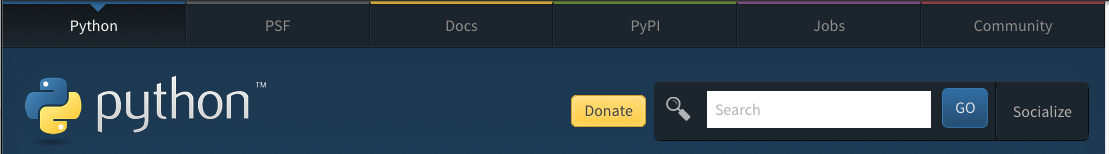

In [8]:
driver.find_element_by_css_selector('#top > nav > ul > li.psf-meta') # li.psf-meta li인데 class가 psf-meta인 것

[<selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="c3c5e527-8757-482a-95b6-349851549812")>]

In [7]:
driver.find_elements_by_css_selector('#top > nav > ul > li')

[<selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="0a2881e8-48bb-40ef-91c7-30ff9be347cd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="c3c5e527-8757-482a-95b6-349851549812")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="ec173a14-3e74-4f9b-9aeb-25682f48b5e2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="49c6ad09-ff6a-4b0b-b634-a48240391f05")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="3d19b49a-66d1-43a6-ac4f-79ad59a81327")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e8e8eece0361a67d7402b894c0b93575", element="fffd45a4-b7e2-41d8-b852-6ae2de00bac2")>]

In [12]:
for i in driver.find_elements_by_css_selector('#top > nav > ul > li'):
    print(i.text)

Python
PSF
Docs
PyPI
Jobs
Community


In [15]:
menu = driver.find_elements_by_css_selector('#top > nav > ul > li')
menu[3].click()

#### 네이버 데이터랩 쇼핑인사이트
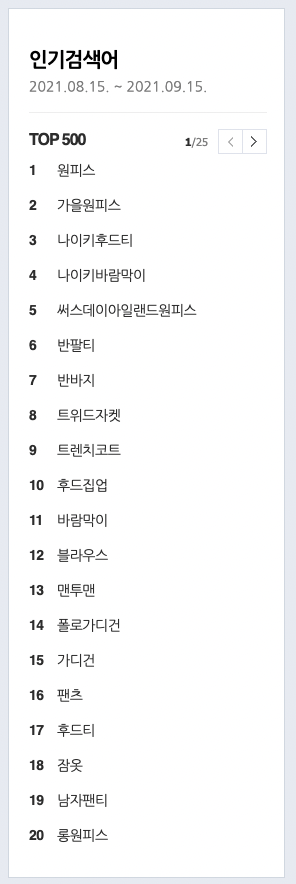

In [61]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://datalab.naver.com/shoppingInsight/sCategory.naver')

In [35]:
# 순위 가져오기
driver.find_elements_by_css_selector('ul.rank_top1000_list li')

[<selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="562da951-1892-44e2-becd-31fe0844e4d2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="2a4a16fe-2465-41ae-b0a7-59669aaad927")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="80aaf549-0748-4ac5-a566-5ef33d9fa0ff")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="697cc627-6cd0-4db3-8e92-7f86f9c6f85a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="3fe329e3-d7ba-44fc-a74e-902db48afea2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="eaaafd20-fd16-47d6-8c5d-7a586b04ec2f")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4eb6ccb204acfb28f987ce70d2f1543a", element="e403435d-2fa0-46ce-b3fb-e7

In [60]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://datalab.naver.com/shoppingInsight/sCategory.naver')

next_tag = driver.find_element_by_css_selector('.btn_page_box a.btn_page_next')
for i in range(0,25):
    for j in driver.find_elements_by_css_selector('.rank_top1000_list li'):
        print(j.text.split('\n'))
    next_tag.click()

['1', '원피스']
['2', '가을원피스']
['3', '나이키후드티']
['4', '나이키바람막이']
['5', '써스데이아일랜드원피스']
['6', '반팔티']
['7', '반바지']
['8', '트위드자켓']
['9', '트렌치코트']
['10', '후드집업']
['11', '바람막이']
['12', '블라우스']
['13', '맨투맨']
['14', '폴로가디건']
['15', '팬츠']
['16', '가디건']
['17', '후드티']
['18', '잠옷']
['19', '남자팬티']
['20', '롱원피스']
['21', '나이키후드집업']
['22', '케네스레이디원피스']
['23', '메종키츠네맨투맨']
['24', '라코스테가디건']
['25', '여성가디건']
['26', '폴로니트']
['27', '쥬시쥬디']
['28', '메종키츠네가디건']
['29', '폴로셔츠']
['30', '버버리퀼팅자켓']
['31', '여성트레이닝세트']
['32', '아노락']
['33', '데님원피스']
['34', '니트조끼']
['35', '메종키츠네']
['36', '강블리gbl남여공용무지반팔7색']
['37', '스톤아일랜드맨투맨']
['38', '스포츠브라']
['39', '모조에스핀원피스']
['40', '폴로랄프로렌']
['21', '나이키후드집업']
['42', '뷔스티에원피스']
['43', '지고트원피스']
['44', '남자가디건']
['45', '커플잠옷']
['46', '하객원피스']
['47', '니트원피스']
['48', '온앤온원피스']
['49', '트위드원피스']
['50', '나이키맨투맨']
['51', '써스데이아일랜드']
['52', '잇미샤원피스']
['53', '모조에스핀']
['54', '꼼데가르송가디건']
['55', '스톤아일랜드']
['56', '미즈바이베이지']
['57', '조거팬츠']
['58', '여성블라우스']
['59', '아디다스바람막이']
['60', '세인트제임스']
['41', '셔츠

['461', '코스']
['462', '여자와이드청바지']
['463', '아노락트레이닝세트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']
['499', '비옷']
['500', '올리비아하슬러']


In [43]:
next_tag = driver.find_element_by_css_selector('.btn_page_box a.btn_page_next')
next_tag.is_enabled()

True

In [53]:
next_tag = driver.find_element_by_css_selector('.btn_page_box a.btn_page_next')
while True:
    for j in driver.find_elements_by_css_selector('.rank_top1000_list li'):
        print(j.text.split('\n'))
    if next_tag.is_enabled():
        next_tag.click()
    else:
        break

['1', '원피스']
['2', '가을원피스']
['3', '나이키후드티']
['4', '나이키바람막이']
['5', '써스데이아일랜드원피스']
['6', '반팔티']
['7', '반바지']
['8', '트위드자켓']
['9', '트렌치코트']
['10', '후드집업']
['11', '바람막이']
['12', '블라우스']
['13', '맨투맨']
['14', '폴로가디건']
['15', '팬츠']
['16', '가디건']
['17', '후드티']
['18', '잠옷']
['19', '남자팬티']
['20', '롱원피스']
['21', '나이키후드집업']
['22', '케네스레이디원피스']
['23', '메종키츠네맨투맨']
['24', '라코스테가디건']
['25', '여성가디건']
['26', '폴로니트']
['27', '쥬시쥬디']
['28', '메종키츠네가디건']
['29', '폴로셔츠']
['30', '버버리퀼팅자켓']
['31', '여성트레이닝세트']
['32', '아노락']
['33', '데님원피스']
['34', '니트조끼']
['35', '메종키츠네']
['36', '강블리gbl남여공용무지반팔7색']
['37', '스톤아일랜드맨투맨']
['38', '스포츠브라']
['39', '모조에스핀원피스']
['40', '폴로랄프로렌']
['21', '나이키후드집업']
['22', '케네스레이디원피스']
['43', '지고트원피스']
['44', '남자가디건']
['45', '커플잠옷']
['46', '하객원피스']
['47', '니트원피스']
['48', '온앤온원피스']
['49', '트위드원피스']
['50', '나이키맨투맨']
['51', '써스데이아일랜드']
['52', '잇미샤원피스']
['53', '모조에스핀']
['54', '꼼데가르송가디건']
['55', '스톤아일랜드']
['56', '미즈바이베이지']
['57', '조거팬츠']
['58', '여성블라우스']
['59', '아디다스바람막이']
['60', '세인트제임스']
['41', '

['480', '나인']
['461', '코스']
['462', '여자와이드청바지']
['463', '아노락트레이닝세트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']
['499', '비옷']
['500', '올리비아하슬러']
['481', '지센']
['482', '시에로']
['483', '분더가이스트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']
['499', '비옷']
['500', '올리비아하슬러']
['481', '지센']
['482', '시에로']
['483', '분더가이스트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']


['483', '분더가이스트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']
['499', '비옷']
['500', '올리비아하슬러']
['481', '지센']
['482', '시에로']
['483', '분더가이스트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']
['499', '비옷']
['500', '올리비아하슬러']
['481', '지센']
['482', '시에로']
['483', '분더가이스트']
['484', '모조에스핀자켓']
['485', '여성청바지']
['486', '오버핏후드티']
['487', '여자땀복']
['488', '바버']
['489', '팬티']
['490', '프릴블라우스']
['491', '레더스커트']
['492', '여자맨투맨']
['493', '헤지스여성티셔츠']
['494', '봄이']
['495', '자바나스']
['496', '메종키츠네니트']
['497', '씨씨콜렉트블라우스']
['498', '남자청자켓']
['499', '비옷']
['500', '올리비아하슬러']
['481', '지센']
['48

KeyboardInterrupt: 

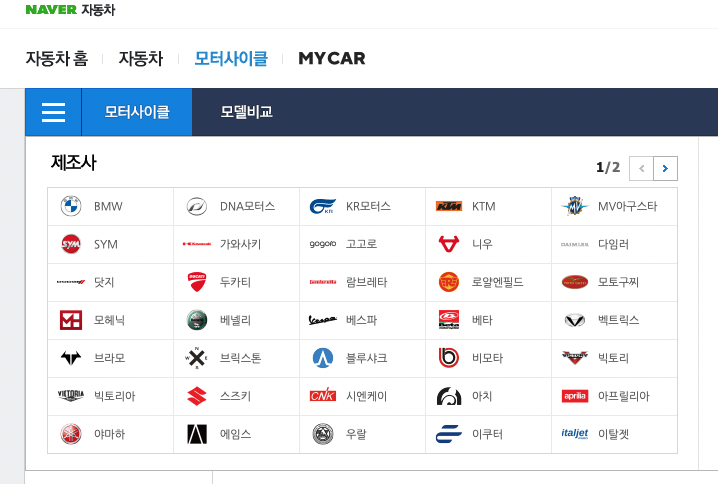

In [ ]:
print('완성코드 - ')
print()

driver = webdriver.Chrome(path) 
driver.get('https://auto.naver.com/bike/mainList.nhn')

a_tag = driver.find_element_by_css_selector('#container > div.spot_main > div.spot_aside > div.tit > a')
a_tag.click()

time.sleep(2)

nextBtn = driver.find_element_by_css_selector('#_vendor_select_layer > div > div.maker_group > div.rolling_btn > button.next')

for idx in range(1, len(cnt)+1) :
    print('page - ' , idx)
    li_tags = driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div.emblem_area > ul > li')
    
    for li in li_tags : 
        brandName = li.find_element_by_tag_name('span').text
        print(brandName)    
        img_src = li.find_element_by_tag_name('img').get_attribute('src')
        print(img_src)
        a_href  = li.find_element_by_tag_name('a').get_attribute('href')
        print(a_href)
    print("*" *  100)
    time.sleep(2)
    nextBtn.click()

driver.quit()

In [146]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('https://auto.naver.com/bike/mainList.nhn')

# 보여지게 해야된다
maker_btn = driver.find_element_by_css_selector('#_vendor_select_layer > a')
maker_btn.click()

# makers = driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div:nth-child(2) > ul > li>a>img')
next_btn = driver.find_element_by_css_selector('#_vendor_select_layer > div > div.maker_group > div.rolling_btn > button.next')

result=[]

i=2
while True:  
    makers = driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div:nth-child({}) > ul > li>a>img '.format(i))
    for maker in makers:
        result.append(maker.get_attribute('src'))
    if next_btn.is_enabled():
        next_btn.click()
        i+=1
    else:
        break
driver.close()

In [147]:
len(result)

50

In [120]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('http://deal.11st.co.kr/html/nc/deal/main.html')

In [127]:
for i in driver.find_elements_by_css_selector('#_vendor_select_layer > div > div.maker_group > div.emblem_area'):
    print(i.get_attribute('style'))


display: none;


### xpath
- 절대경로를 이용한 노드 탐색 
- 노드석택

In [148]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('http://deal.11st.co.kr/html/nc/deal/main.html')

In [149]:
# css
driver.find_elements_by_css_selector('#emergencyPrd>div>ul>li')

[<selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="6d438858-480f-409a-96bc-23f06325a196")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="798bc9fd-f683-4087-b7e2-e398db625211")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="8d03ed2c-bc3d-445f-b585-3cb173a33389")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="02572b43-8372-42a6-a539-da4e7a909bbe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="d1dab097-090b-44b6-8463-3fd8395510f5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="b519f9c6-d713-4315-92ab-cb4fb39e2616")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="f6adaf0a-d924-455f-9b45-2e

In [152]:
# xpath
driver.find_elements_by_xpath('//*[@id="emergencyPrd"]/div/ul/li')

[<selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="6d438858-480f-409a-96bc-23f06325a196")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="798bc9fd-f683-4087-b7e2-e398db625211")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="8d03ed2c-bc3d-445f-b585-3cb173a33389")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="02572b43-8372-42a6-a539-da4e7a909bbe")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="d1dab097-090b-44b6-8463-3fd8395510f5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="b519f9c6-d713-4315-92ab-cb4fb39e2616")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f7c55c6fd63e20cb20302da5840f9c7d", element="f6adaf0a-d924-455f-9b45-2e

In [4]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)
driver.get('http://deal.11st.co.kr/html/nc/deal/main.html')
print('css selector - ')
print()
# li_tags = driver.find_elements_by_css_selector('#emergencyPrd > div > ul > li')
# li_tags

print()
print('xpath - ')
print()


# //*[@id="2037093280"]/div/a/div[3]/p/span[2]
# //*[@id="1117907464"]/div/a/div[3]/p/span[2]


# //*[@id="2037093280"]/div/a/div[3]/div/span[2]/strong
# //*[@id="1117907464"]/div/a/div[3]/div/span[2]/strong

li_tags = driver.find_elements_by_xpath('//*[@id="emergencyPrd"]/div/ul/li[position() <= 3]')
for li in li_tags : 
    title = li.find_element_by_xpath('./div/a/div[3]/p/span[2]')
    price = li.find_element_by_xpath('./div/a/div[3]/div/span[2]/strong')
        
    print(title.text)
    print(price.get_attribute('innerHTML'))
    print("*" * 50)

driver.close()

css selector - 


xpath - 

[밀크마일] 한가위 특별 S.A.L.E! 상하복/원피스/레깅스/가디건 外
6,900
**************************************************
[25%+T11%] 아모레퍼시픽 가을 보습대전! 에스트라/라네즈/아이오페/한율/마몽드 11번가 단독 특별구성
17,500
**************************************************
[리바트]9/16(목)! 코모 가드니아 쿼츠 주방 특가+후드OR핸드블랜더+냄비세트+3구법랑쿡탑+쿠폰가115만~
1,159,900
**************************************************


### 실습

In [174]:
path = './driver/chromedriver'
driver = webdriver.Chrome(path)

In [154]:
import time

In [169]:
for page in range(1,3):
    url = f'https://www.ildong.com/kor/product/list.id?page={page}&halt=&prdDisease=&prdCategory=&searchVal=&searchOption=0'
    driver.get(url)
    print('page:',page)
    time.sleep(2)
    
    prList = driver.find_element_by_class_name('prList')
    a_tags = prList.find_elements_by_tag_name('a')
    #print(a_tags)
   
    for product in range(0,9):
        a_tags[product].click()
        tag = driver.find_element_by_class_name('detailCnt2')
        print(tag.text)
        print('*'*50)
        time.sleep(2)
        driver.back()
        
        prList = driver.find_element_by_class_name('prList')
        a_tags = prList.find_elements_by_tag_name('a')
        


page: 1
제품특징

간건강에 도움을 주는 밀크씨슬
지친 간을 위한 자연의 선물, 밀크씨슬
※본 제품은 질병의 예방 및 치료를 위한 의약품이 아니며 인체에 유용한 기능성을 가진 원료나 성분을 사용하여 제조·가공한 건강기능식품입니다.


성분/함량

<기능성원료 및 함량>
1일 섭취량(1캡슐) 당
실리마린 : 130 mg
  ※대두, 쇠고기 함유


기능정보

<기능정보>
[실리마린]간 건강에 도움을 줄 수 있음


섭취방법

<섭취량 및 섭취방법>
1일 1회, 1회 1캡슐을 충분한 물과 함께 섭취하십시오.


포장단위

750 mg X 30캡슐(22.5 g)
**************************************************
제품특징

1. 하루1캡슐: 하루 1캡슐로 간편하게 섭취하는 현대인의 장 건강을 위한 100억 프로바이오틱스(유산균)
2. 4중코팅 특허기술: 유산균 명가 일동제약의 4중 코팅 특허 기술로 장까지 도달하는 프로바이오틱스(건강기능식품)
3. 한국인 맞춤: 한국형 프로바이오틱스 (유산균) 5종함유


성분/함량

프로바이오틱스 10,000,000,000 CFU


기능정보

[프로바이오틱스] 유산균 증식 및 유해균 억제에 도움을 줄 수 있음, 배변 활동 원활에 도움을 줄 수 있음


섭취방법

1일 1회, 1회 1캡슐


포장단위

500mg x 30캡슐/30일분
**************************************************
제품특징

1. 글루타치온 50%함유된 효모추출물 240mg사용
2. 100%국산 미배아대두발효 추출분말 500mg사용
3. 레몬농축액 함유로 새콤달콤 맛있고 가볍게 즐기는 구미
4. 수용성 커큐민인 네오큐민 함유


포장단위

3g x 8개, 24g
**************************************************
제품특징

중년 남성을 위한 6가지 기능성으로 더욱 당당하게, 더욱 상쾌하게!
쏘팔메토 추출물, 아연, 비타민B6, 옥타코사놀


In [185]:
for page in range(1,3):
    url = f'https://www.ildong.com/kor/product/list.id?page={page}&halt=&prdDisease=&prdCategory=&searchVal=&searchOption=0'
    driver.get(url)
    print('page:',page)
    time.sleep(2)
    
   
    for i in range(1,10):
        li = driver.find_element_by_xpath(f'//*[@id="contents"]/div[2]/div[2]/div[2]/div[1]/ul/li[{i}]')
        a_tag = li.find_element_by_xpath('a')
        a_tag.click()
        tag = driver.find_element_by_class_name('detailCnt2')
        print(tag.text)
        print('*'*50)
        
        time.sleep(2)
        driver.back()

page: 1
제품특징

간건강에 도움을 주는 밀크씨슬
지친 간을 위한 자연의 선물, 밀크씨슬
※본 제품은 질병의 예방 및 치료를 위한 의약품이 아니며 인체에 유용한 기능성을 가진 원료나 성분을 사용하여 제조·가공한 건강기능식품입니다.


성분/함량

<기능성원료 및 함량>
1일 섭취량(1캡슐) 당
실리마린 : 130 mg
  ※대두, 쇠고기 함유


기능정보

<기능정보>
[실리마린]간 건강에 도움을 줄 수 있음


섭취방법

<섭취량 및 섭취방법>
1일 1회, 1회 1캡슐을 충분한 물과 함께 섭취하십시오.


포장단위

750 mg X 30캡슐(22.5 g)
**************************************************
제품특징

1. 하루1캡슐: 하루 1캡슐로 간편하게 섭취하는 현대인의 장 건강을 위한 100억 프로바이오틱스(유산균)
2. 4중코팅 특허기술: 유산균 명가 일동제약의 4중 코팅 특허 기술로 장까지 도달하는 프로바이오틱스(건강기능식품)
3. 한국인 맞춤: 한국형 프로바이오틱스 (유산균) 5종함유


성분/함량

프로바이오틱스 10,000,000,000 CFU


기능정보

[프로바이오틱스] 유산균 증식 및 유해균 억제에 도움을 줄 수 있음, 배변 활동 원활에 도움을 줄 수 있음


섭취방법

1일 1회, 1회 1캡슐


포장단위

500mg x 30캡슐/30일분
**************************************************
제품특징

1. 글루타치온 50%함유된 효모추출물 240mg사용
2. 100%국산 미배아대두발효 추출분말 500mg사용
3. 레몬농축액 함유로 새콤달콤 맛있고 가볍게 즐기는 구미
4. 수용성 커큐민인 네오큐민 함유


포장단위

3g x 8개, 24g
**************************************************
제품특징

중년 남성을 위한 6가지 기능성으로 더욱 당당하게, 더욱 상쾌하게!
쏘팔메토 추출물, 아연, 비타민B6, 옥타코사놀


In [179]:
li_tags = driver.find_elements_by_xpath('//*[@id="contents"]/div[2]/div[2]/div[2]/div[1]/ul/li')
for li in li_tags:
    print(li.find_element_by_xpath('a').get_attribute('href'))

https://www.ildong.com/kor/product/view.id?prdSeq=1263
https://www.ildong.com/kor/product/view.id?prdSeq=3209
https://www.ildong.com/kor/product/view.id?prdSeq=3198
https://www.ildong.com/kor/product/view.id?prdSeq=2862
https://www.ildong.com/kor/product/view.id?prdSeq=3208
https://www.ildong.com/kor/product/view.id?prdSeq=3082
https://www.ildong.com/kor/product/view.id?prdSeq=2865
https://www.ildong.com/kor/product/view.id?prdSeq=2866
https://www.ildong.com/kor/product/view.id?prdSeq=3202


In [ ]:
//*[@id="contents"]/div[2]/div[2]/div[2]/div[1]


//*[@id="contents"]/div[2]/div[2]/div[2]/div[1]/ul/li[1]
//*[@id="contents"]/div[2]/div[2]/div[2]/div[1]/ul/li[1]